In [33]:
mtx_file = "10X_PBMC/01_raw_data/gex_matrix/filtered_feature_bc_matrix/matrix.mtx.gz"
features_file = "10X_PBMC/01_raw_data/gex_matrix/filtered_feature_bc_matrix/features.tsv.gz"
barcodes_file = "10X_PBMC/01_raw_data/gex_matrix/filtered_feature_bc_matrix/barcodes.tsv.gz"

In [34]:
library(Seurat)

In [35]:
setwd(here::here()) # set working directory to project root
getwd()

[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

In [36]:
pbmc.data <- Read10X(data.dir = dirname(mtx_file))


In [ ]:
names(pbmc.data)

[1] "Gene Expression" "Peaks"

# 10X PBMC clustering using Seurat
This notebook adds a minimal Seurat workflow: create Seurat object from Read10X output (variable `PBMC` in earlier cell), QC/filtering, normalization, PCA, clustering, UMAP, and marker finding. Adjust filtering thresholds and clustering resolution to your dataset.

In [ ]:
# Create Seurat object and perform basic QC
library(dplyr)

# `PBMC` was created earlier with Read10X
pbmc <- CreateSeuratObject(counts = pbmc.data[[1]], project = "PBMC10K", min.cells = 3, min.features = 200)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




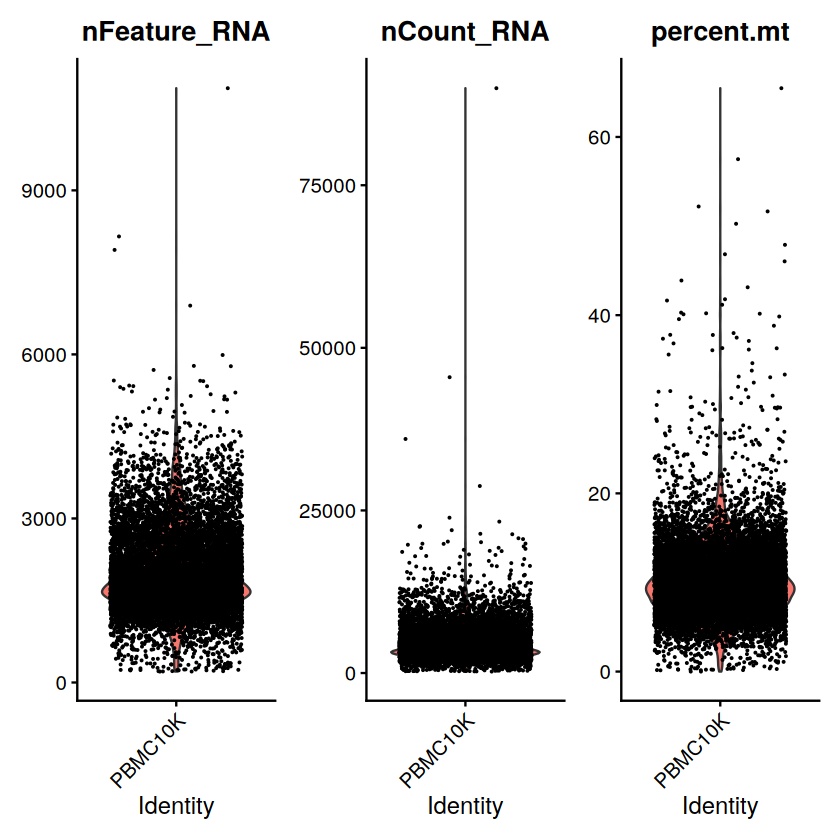

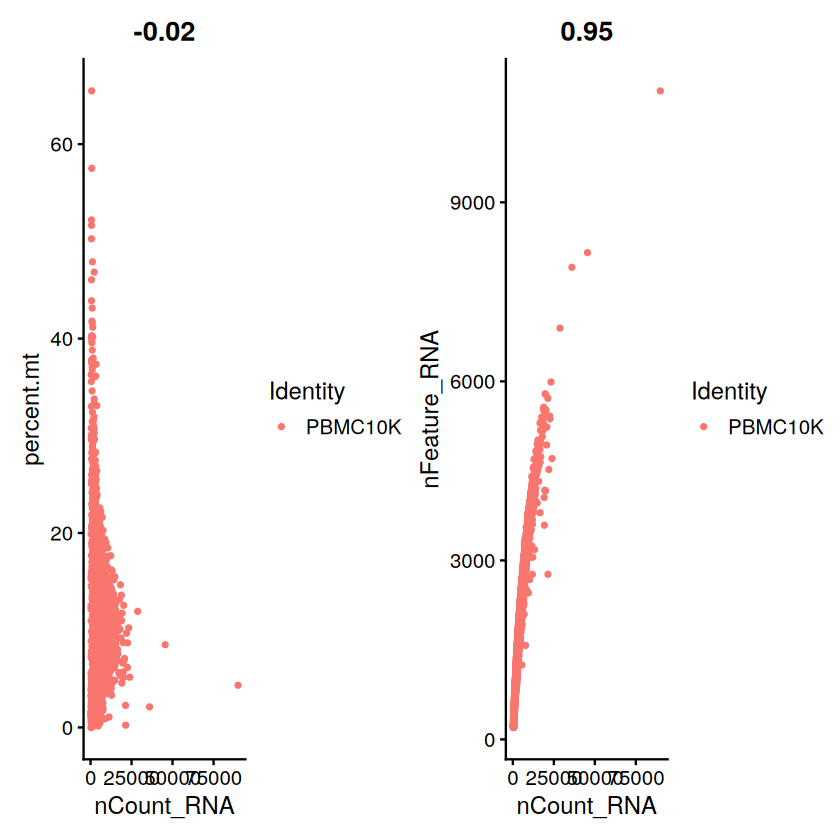

In [ ]:


# percent mitochondrial genes (human: MT- prefix)
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

# QC plots
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2



In [ ]:
# Filter cells - adjust thresholds as needed
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 3000 & percent.mt < 25)

pbmc

An object of class Seurat 
26346 features across 10628 samples within 1 assay 
Active assay: RNA (26346 features, 0 variable features)

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


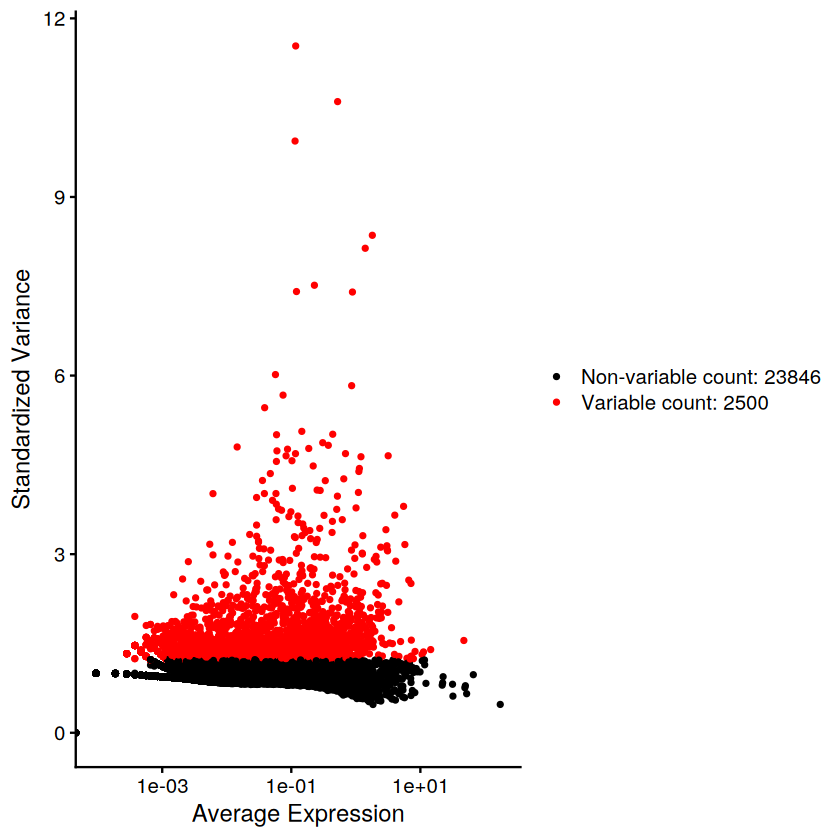

In [ ]:
# Normalization, dimensionality reduction and clustering

# Normalize and identify variable features
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 1e6)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2500)

# Visualize variable features
top10 <- head(VariableFeatures(pbmc), 10)
VariableFeaturePlot(pbmc)




Centering and scaling data matrix

PC_ 1 
Positive:  SLC8A1, PLXDC2, LRMDA, RBM47, IRAK3, MCTP1, DMXL2, LRRK2, CSF3R, TNFAIP2 
	   TBXAS1, CLEC7A, GAB2, TLR2, HCK, FCN1, NAMPT, CYBB, FGD4, LYN 
	   JAK2, CD36, TYMP, ZEB2, FAM49A, STX11, MARCH1, SLC11A1, AC020916.1, CPPED1 
Negative:  BCL11B, CD247, CAMK4, RPS27, IL32, BACH2, LEF1, IL7R, INPP4B, BCL2 
	   SYNE2, CD96, LTB, THEMIS, RPS12, EEF1A1, RPS18, RORA, RPS29, RPS14 
	   TRBC2, RPL10, TXK, ANK3, STAT4, RPS23, GRAP2, CCR7, RPS15A, CARD11 
PC_ 2 
Positive:  PAX5, MS4A1, FCRL1, BANK1, EBF1, LINC00926, NIBAN3, OSBPL10, CD22, IGHM 
	   COBLL1, CD79A, BLK, BLNK, AP002075.1, COL19A1, IGHD, ADAM28, AFF3, RALGPS2 
	   PLEKHG1, CD79B, AC120193.1, DENND5B, GNG7, FCRL2, LINC02397, BCL11A, SPIB, FCER2 
Negative:  BCL11B, CD247, IL32, DPYD, AOAH, INPP4B, IL7R, CAMK4, THEMIS, PDE3B 
	   LEF1, TXK, RORA, ANXA1, STAT4, SLCO3A1, SRGN, NEAT1, ADGRE5, ARHGAP26 
	   FNDC3B, GNAQ, TRBC1, NCALD, IPCEF1, SAMD3, ID2, APBA2, PLCB1, GRAP2 
PC_ 3 
Positive:  

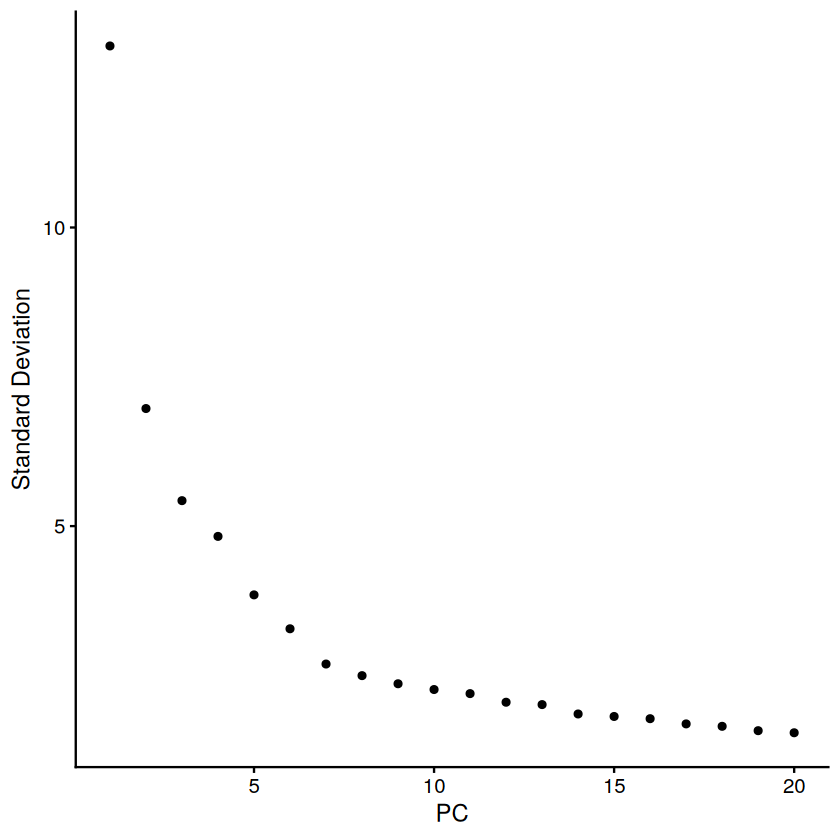

In [ ]:
# Scale, PCA
pbmc <- ScaleData(pbmc, features = VariableFeatures(pbmc))
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
ElbowPlot(pbmc)



In [37]:
# Neighborhood graph, clustering and UMAP
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)
pbmc <- RunUMAP(pbmc, dims = 1:10)



Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10628
Number of edges: 363987

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 12
Elapsed time: 1 seconds


13:15:12 UMAP embedding parameters a = 0.9922 b = 1.112

13:15:12 Read 10628 rows and found 10 numeric columns

13:15:12 Using Annoy for neighbor search, n_neighbors = 30

13:15:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:15:13 Writing NN index file to temp file /tmp/RtmpaPwDsn/file999f55576db55

13:15:13 Searching Annoy index using 1 thread, search_k = 3000

13:15:16 Annoy recall = 100%

13:15:17 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:15:17 Initializing from normalized Laplacian + noise (using irlba)

13:15:18 Commencing optimization for 200 epochs, with 431900 positive edges

13:15:18 Using rng type: pcg

13:15:23 Optimization finished



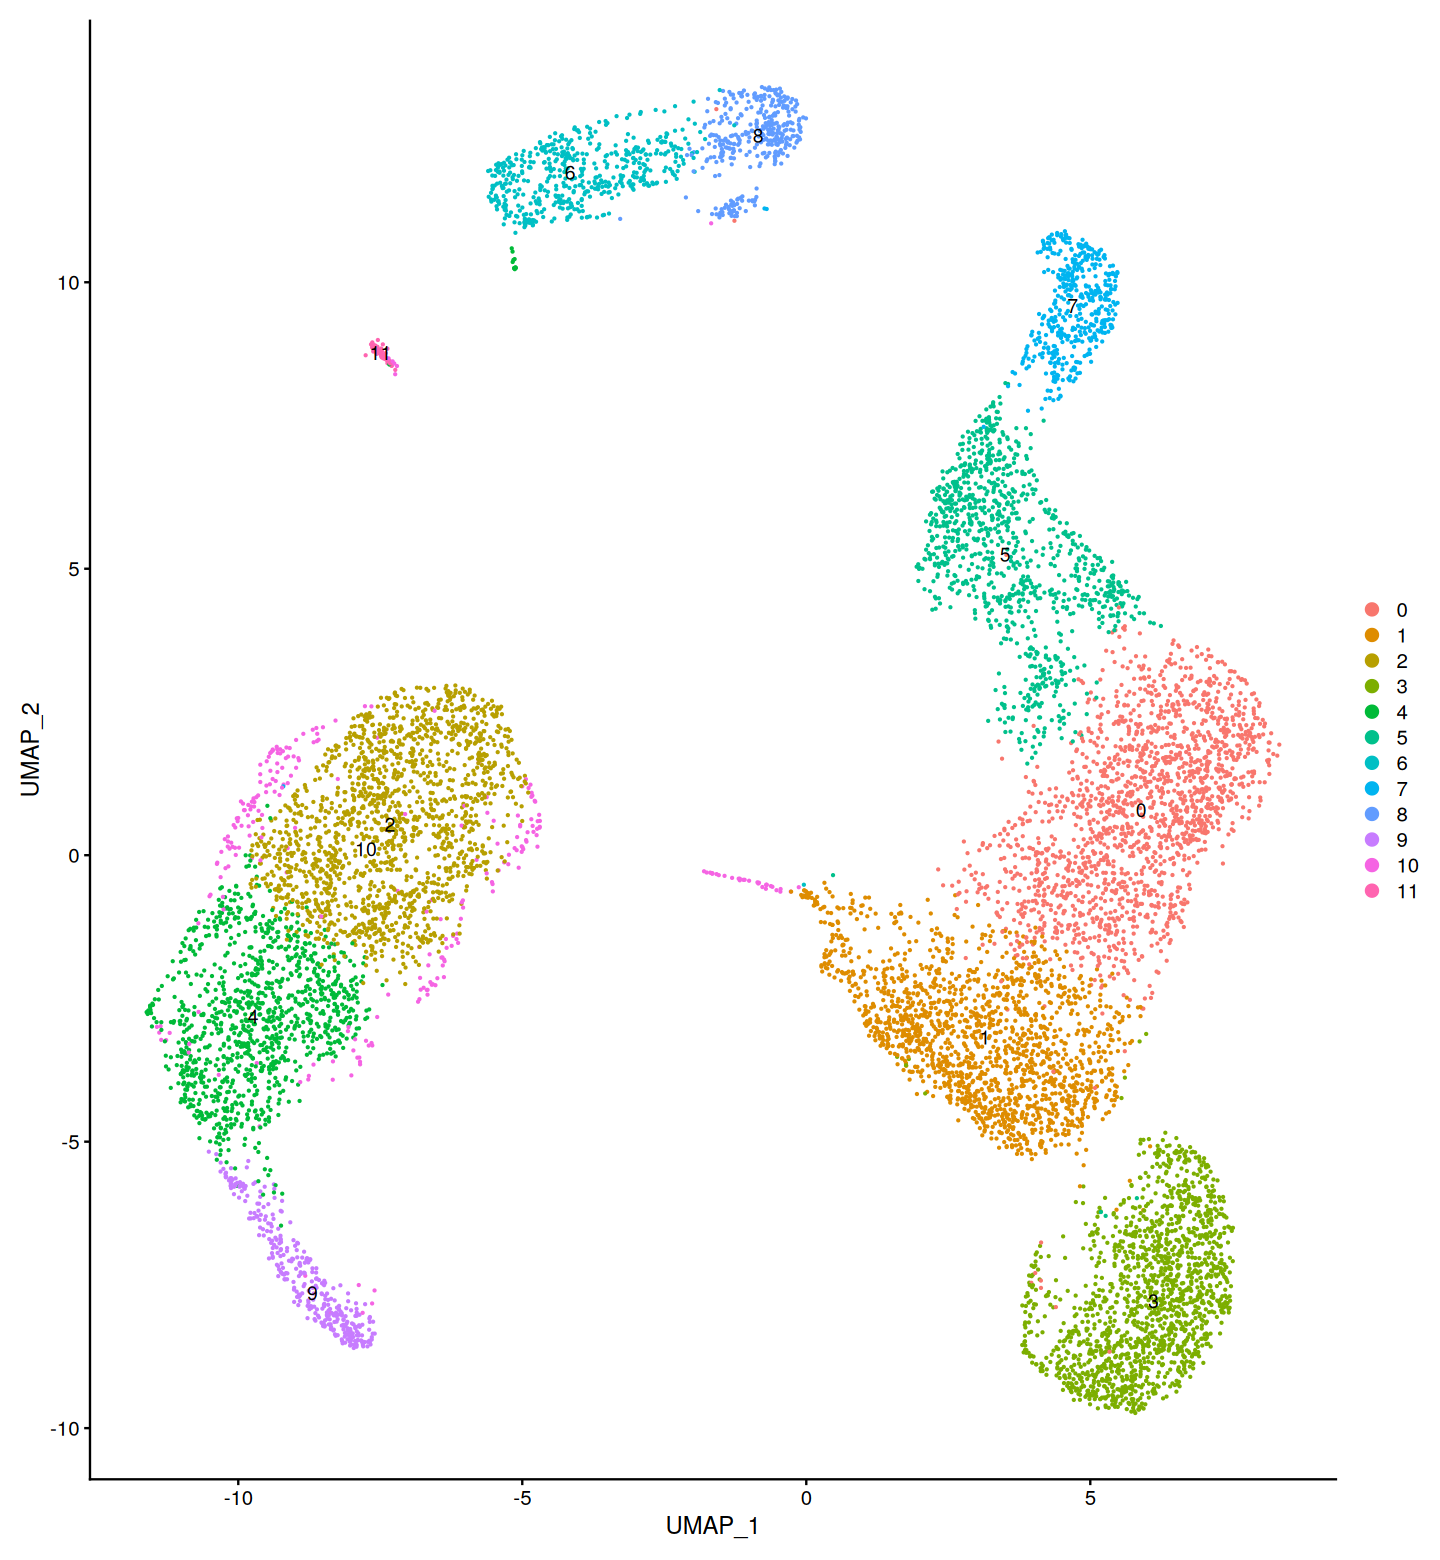

In [38]:
# Plot UMAP
DimPlot(pbmc, reduction = "umap", label = TRUE)

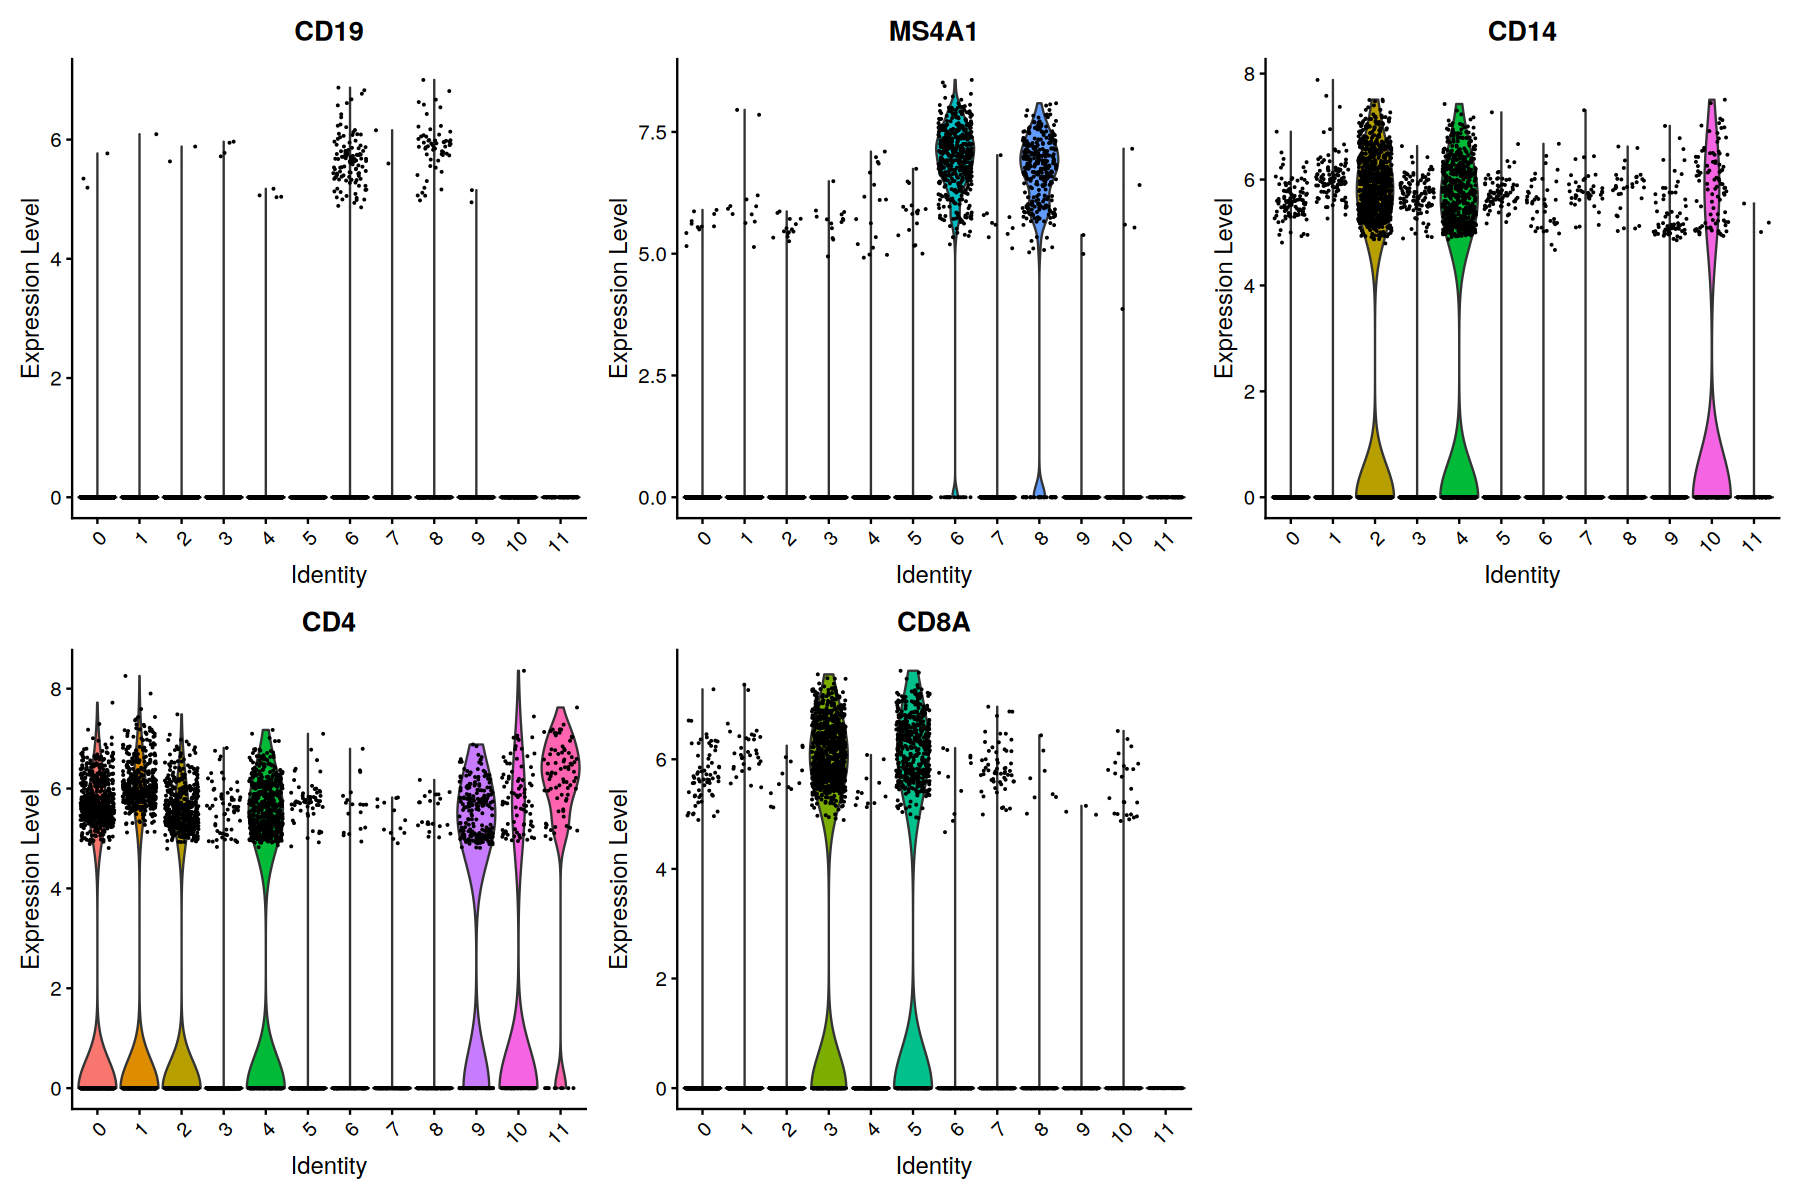

In [39]:
options(repr.plot.width = 15, repr.plot.height = 10) 

VlnPlot(pbmc, features = c("CD19","MS4A1","CD14","CD4","CD8A"))


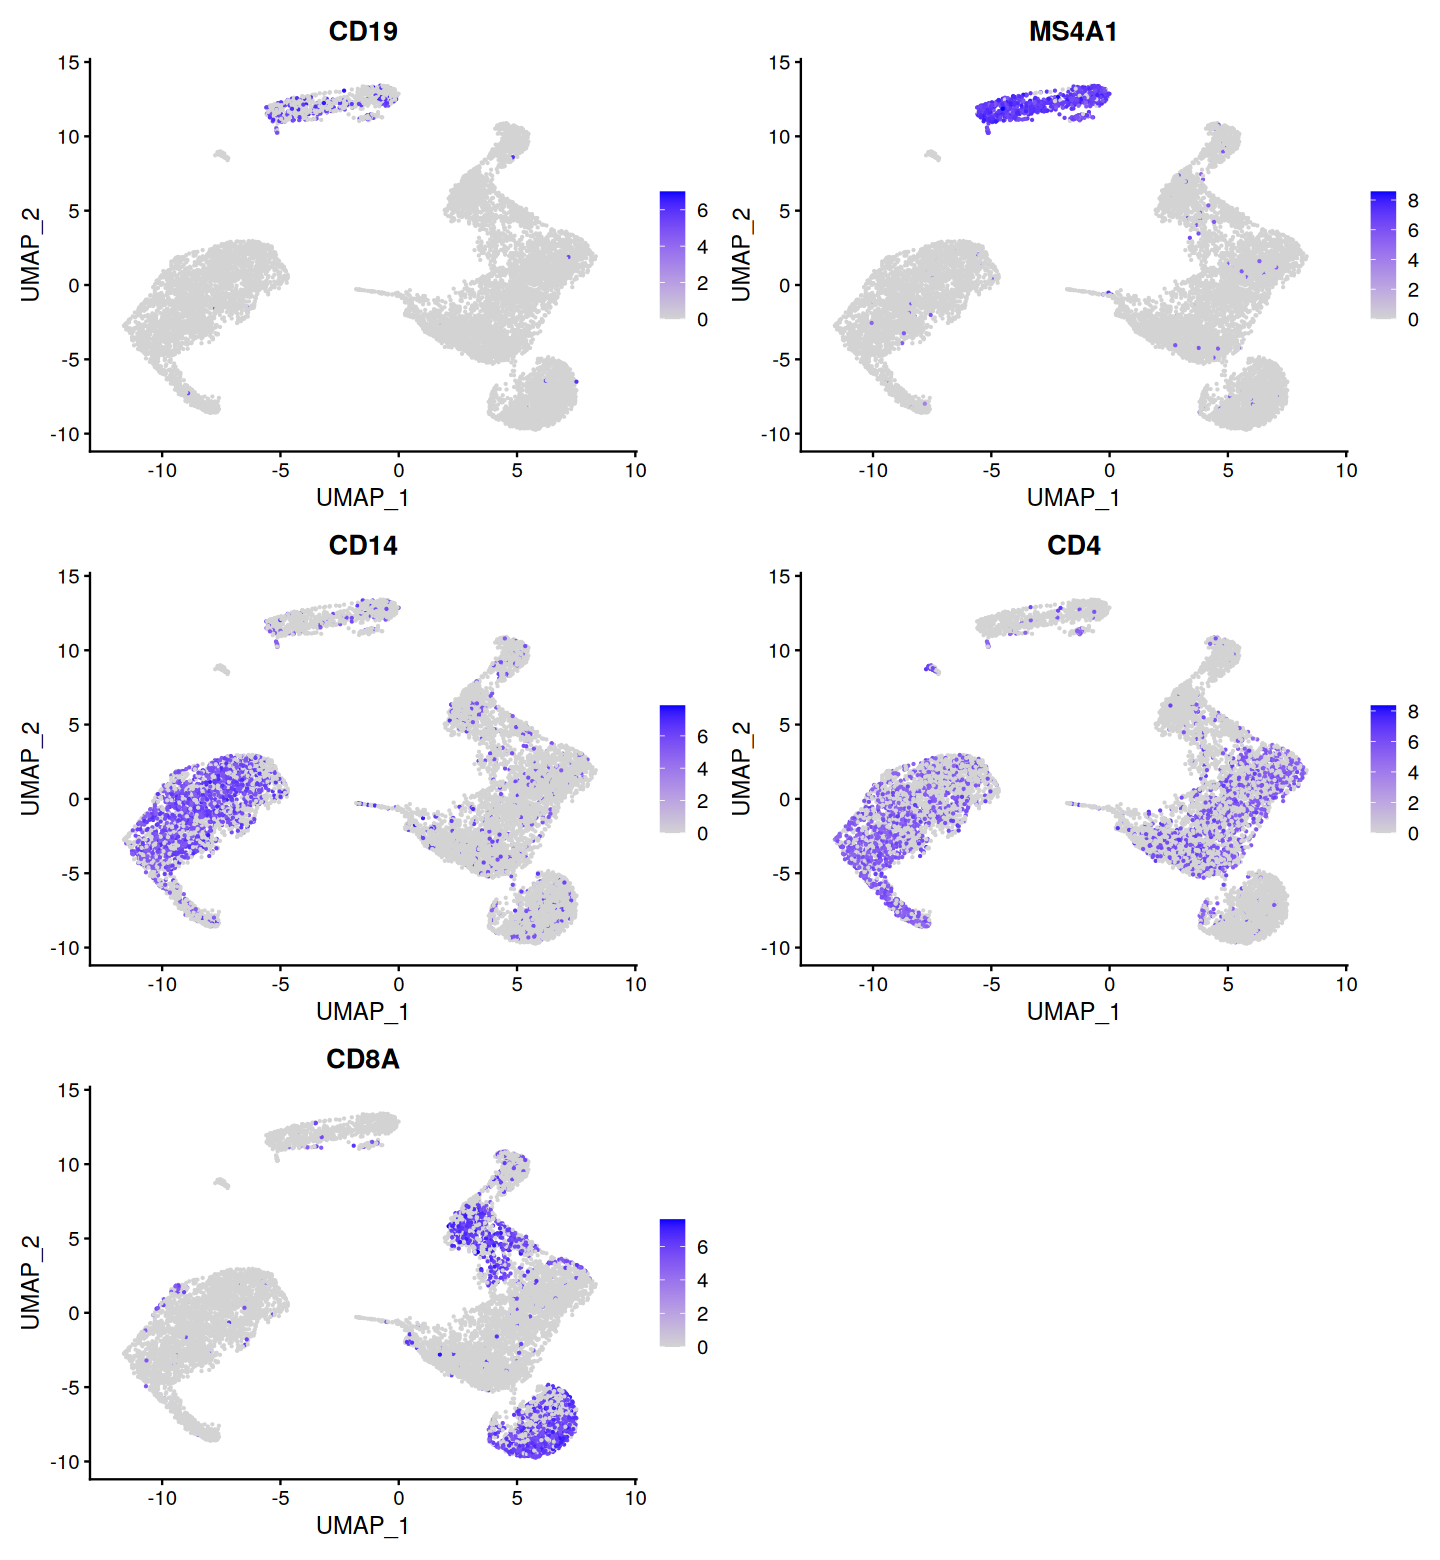

In [40]:
options(repr.plot.width = 12, repr.plot.height = 13) 
FeaturePlot(pbmc, features = c("CD19","MS4A1","CD14","CD4","CD8A"))

In [47]:
pbmc = SetIdent(pbmc,value = "RNA_snn_res.0.5")

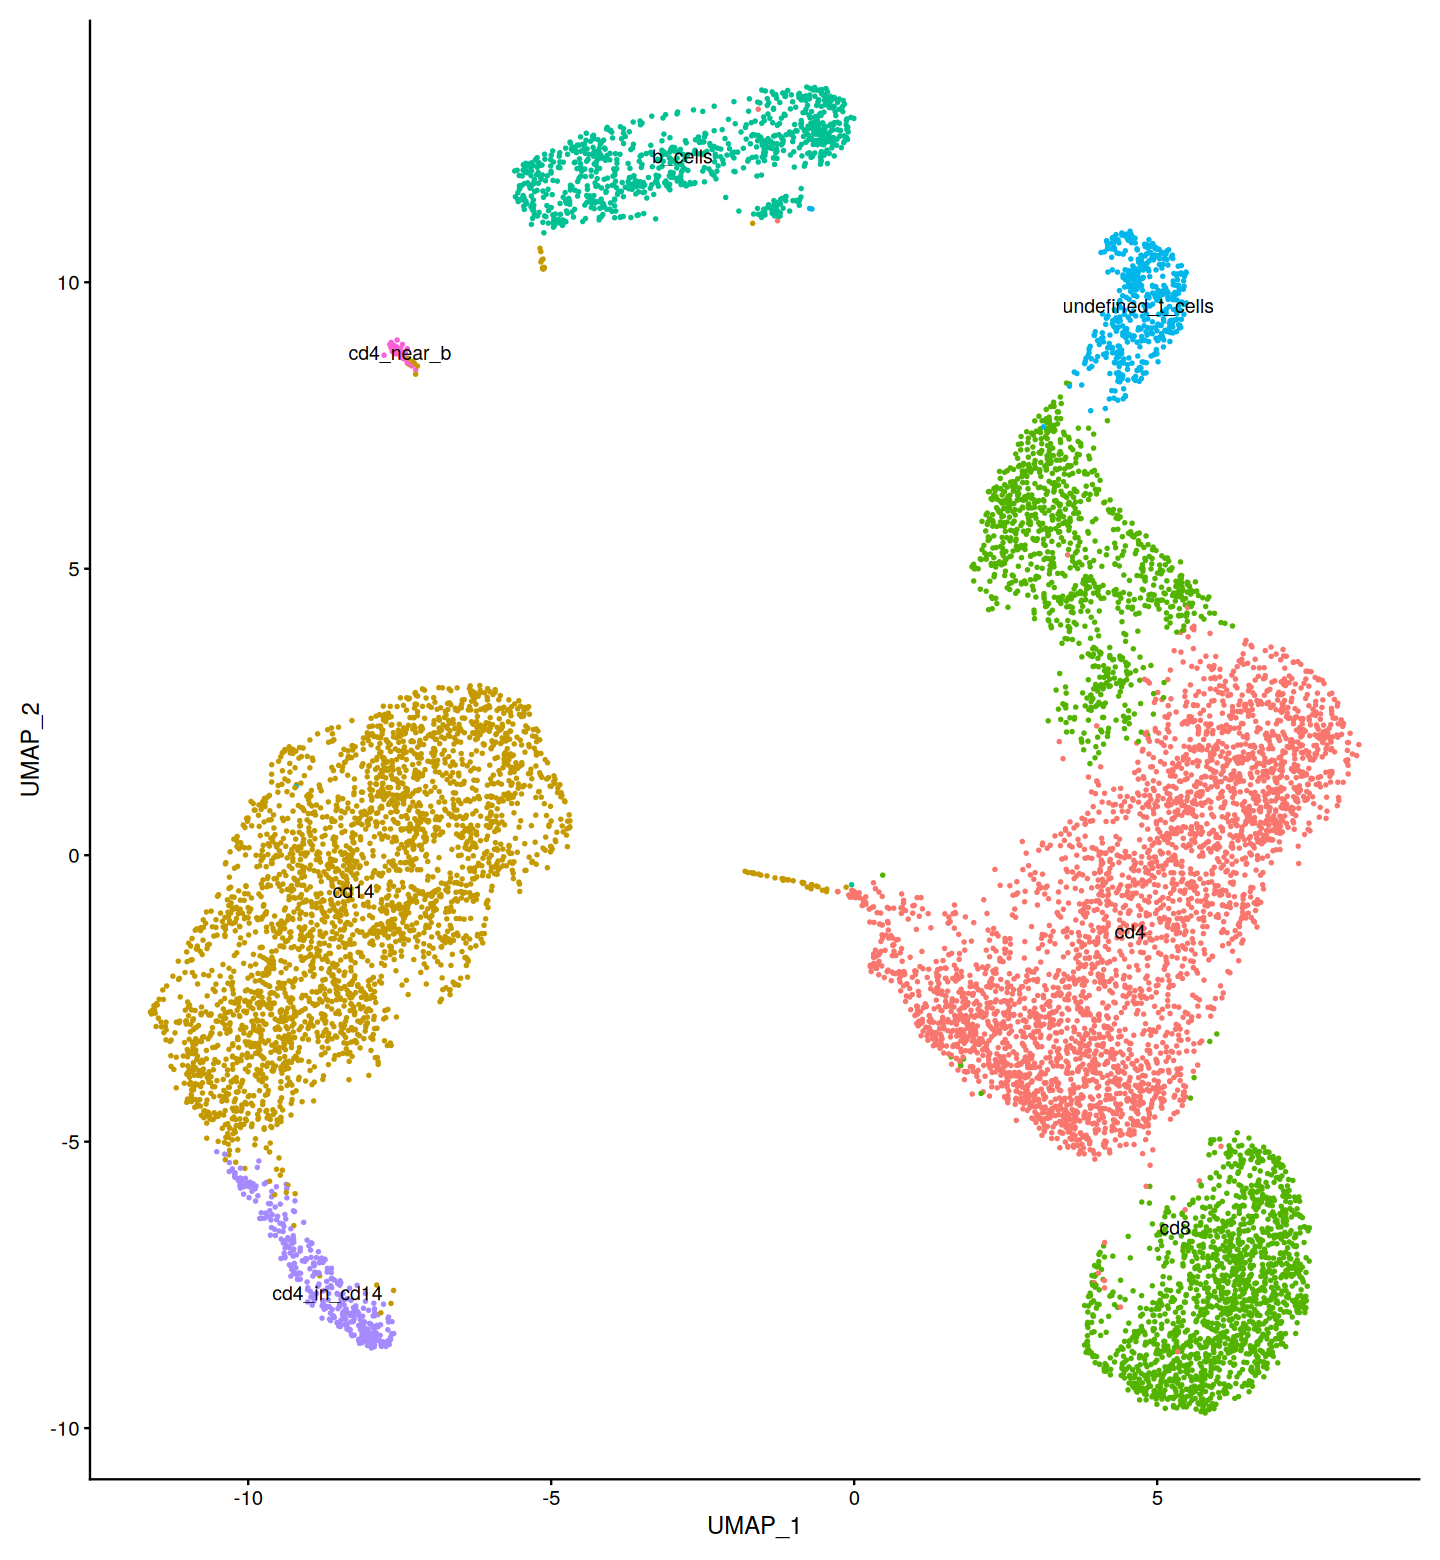

In [48]:
# set clusters based on marker genes
cd4_clusters = c(0,1)
cd4_in_cd14 = c(9)
cd4_near_b = c(11)
cd8_clusters = c(3,5)
cd14_clusters = c(2,10,4)
b_clusters = c(6,8)
undefined_t_cells = c(7) 
all_values <- c(cd4_clusters, cd4_in_cd14, cd4_near_b, cd8_clusters, cd14_clusters, b_clusters, undefined_t_cells)
all_names = c(rep("cd4", length(cd4_clusters)),
                rep("cd4_in_cd14", length(cd4_in_cd14)),
                rep("cd4_near_b", length(cd4_near_b)),
                rep("cd8", length(cd8_clusters)),
                rep("cd14", length(cd14_clusters)),
                rep("b_cells", length(b_clusters)),
                rep("undefined_t_cells", length(undefined_t_cells))
                )

names(all_values) <- all_names
#order all_values by value
all_values = all_values[order(all_values)]
new.cluster.ids = names(all_values) 
names(new.cluster.ids) <- levels(pbmc)

pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()



In [53]:
saveRDS(object = as.data.frame(pbmc@active.ident),file = "10X_PBMC/PBMC_RNA_idents.RDS")